In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Instagram_Analytics.csv")

In [3]:
df.shape

(29999, 15)

In [4]:
df.describe()

,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,engagement_rate
count,29999.000000,29999.000000,29999.000000,29999.000000,2.999900e+04,2.999900e+04,29999.000000,29999.000000,29999.000000,29999.000000
mean,99912.661789,5017.781426,2502.912564,7490.124637,9.965616e+05,1.246669e+06,1103.110904,14.887430,502.152805,14.419276
std,57905.967401,2888.404881,1448.320395,4352.546949,5.777906e+05,5.970924e+05,635.991308,9.005811,290.364038,29.660210
min,7.000000,0.000000,0.000000,0.000000,1.650000e+02,5.107000e+03,0.000000,0.000000,0.000000,0.120000
25%,49755.000000,2530.500000,1246.000000,3690.500000,4.936810e+05,7.469585e+05,555.000000,7.000000,251.000000,5.180000
50%,99580.000000,5042.000000,2498.000000,7483.000000,9.921810e+05,1.241026e+06,1100.000000,15.000000,501.000000,9.190000
75%,150225.000000,7518.000000,3768.000000,11294.000000,1.494798e+06,1.749264e+06,1656.000000,23.000000,755.000000,15.670000
max,200000.000000,10000.000000,5000.000000,15000.000000,1.999865e+06,2.497940e+06,2200.000000,30.000000,1000.000000,3259.820000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_id           29999 non-null  object 
 1   upload_date       29999 non-null  object 
 2   media_type        29999 non-null  object 
 3   likes             29999 non-null  int64  
 4   comments          29999 non-null  int64  
 5   shares            29999 non-null  int64  
 6   saves             29999 non-null  int64  
 7   reach             29999 non-null  int64  
 8   impressions       29999 non-null  int64  
 9   caption_length    29999 non-null  int64  
 10  hashtags_count    29999 non-null  int64  
 11  followers_gained  29999 non-null  int64  
 12  traffic_source    29999 non-null  object 
 13  engagement_rate   29999 non-null  float64
 14  content_category  29999 non-null  object 
dtypes: float64(1), int64(9), object(5)
memory usage: 3.4+ MB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.nunique().sum()

np.int64(153415)

In [8]:
df.isnull().sum()

post_id             0
upload_date         0
media_type          0
likes               0
comments            0
shares              0
saves               0
reach               0
impressions         0
caption_length      0
hashtags_count      0
followers_gained    0
traffic_source      0
engagement_rate     0
content_category    0
dtype: int64

In [9]:
df['upload_date'] = pd.to_datetime(df['upload_date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   post_id           29999 non-null  object        
 1   upload_date       29999 non-null  datetime64[ns]
 2   media_type        29999 non-null  object        
 3   likes             29999 non-null  int64         
 4   comments          29999 non-null  int64         
 5   shares            29999 non-null  int64         
 6   saves             29999 non-null  int64         
 7   reach             29999 non-null  int64         
 8   impressions       29999 non-null  int64         
 9   caption_length    29999 non-null  int64         
 10  hashtags_count    29999 non-null  int64         
 11  followers_gained  29999 non-null  int64         
 12  traffic_source    29999 non-null  object        
 13  engagement_rate   29999 non-null  float64       
 14  content_category  2999

In [11]:
#Which post received the highest likes?
df.loc[df['likes'].idxmax()]

post_id                              IG0025572
upload_date         2025-06-03 09:25:22.954916
media_type                                Reel
likes                                   200000
comments                                  6629
shares                                    3634
saves                                     3332
reach                                  1695246
impressions                            1955467
caption_length                            1121
hashtags_count                              25
followers_gained                            31
traffic_source                       Home Feed
engagement_rate                          10.92
content_category                          Food
Name: 25571, dtype: object

In [12]:
#Calculate average engagement rate by media type.
df.groupby('media_type')['engagement_rate'].mean()


media_type
Carousel    14.323362
Photo       14.191059
Reel        14.540539
Video       14.619641
Name: engagement_rate, dtype: float64

In [13]:
#Find total likes, comments, and shares.
df[['likes','comments','shares']].sum()

likes       2997279941
comments     150528425
shares        75084874
dtype: int64

In [14]:
#Find top 5 posts with highest impressions.
df.nlargest(5,'impressions')

,post_id,upload_date,media_type,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,traffic_source,engagement_rate,content_category
20431,IG0020432,2025-01-21 09:25:22.954916,Reel,6136,1089,1812,7471,1998043,2497940,1039,10,63,Profile,0.66,Beauty
22417,IG0022418,2025-01-22 09:25:22.954916,Video,91014,5764,2242,13111,1995130,2489252,1954,10,941,Profile,4.50,Comedy
19316,IG0019317,2024-12-21 09:25:22.954916,Carousel,97020,8132,4976,6805,1987471,2485727,2155,18,252,Explore,4.70,Food
24301,IG0024302,2025-07-10 09:25:22.954916,Photo,168158,6336,1986,12821,1995261,2484270,1768,10,263,External,7.62,Fitness
3909,IG0003910,2024-12-12 09:25:22.954916,Video,14963,1586,554,12587,1985455,2482212,1734,21,713,Reels Feed,1.20,Beauty


In [15]:
#Count posts for each content category.
df['content_category'].value_counts()

content_category
Photography    3035
Fashion        3034
Technology     3025
Lifestyle      3017
Food           3010
Fitness        3004
Music          3003
Travel         2968
Beauty         2953
Comedy         2950
Name: count, dtype: int64

* Bar Chart 

In [16]:
#Bar chart: Total likes per media type.
likes_mediatype = df.groupby('media_type')['likes'].sum()

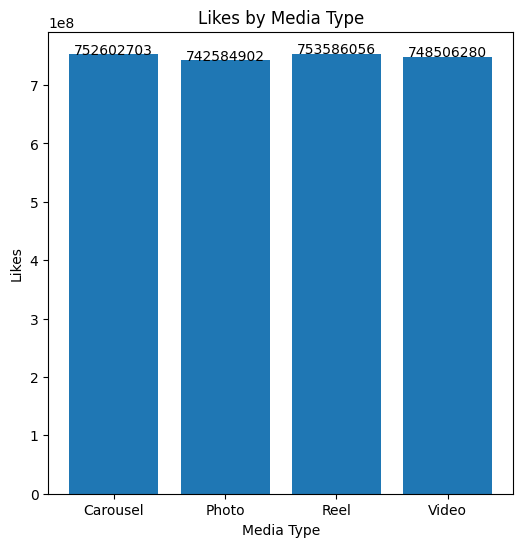

In [17]:
plt.figure(figsize = (6,6))

plt.bar(likes_mediatype.index , likes_mediatype.values)

for i, v in enumerate(likes_mediatype.values):
    plt.text(i, v + 0.9, str(v), ha = 'center', fontsize = 10)

plt.xlabel("Media Type")
plt.ylabel("Likes")
plt.title("Likes by Media Type")
plt.show()

* Pie chart

In [18]:
#Distribution of content categories.
dist_cc = df['content_category'].value_counts()

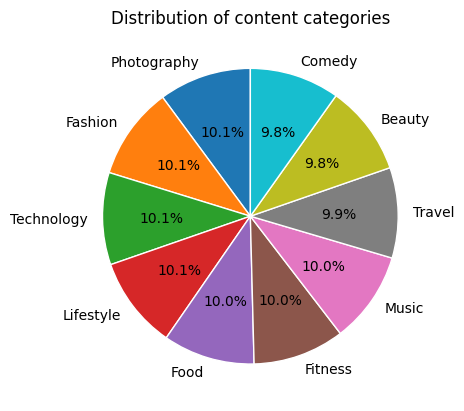

In [19]:
plt.pie(x = dist_cc.values, labels = dist_cc.index , autopct = '%1.1f%%', startangle = 90 , wedgeprops = {'edgecolor':'white'})
plt.title('Distribution of content categories')
plt.show()

* Hexbin plot

<Figure size 1200x1200 with 0 Axes>

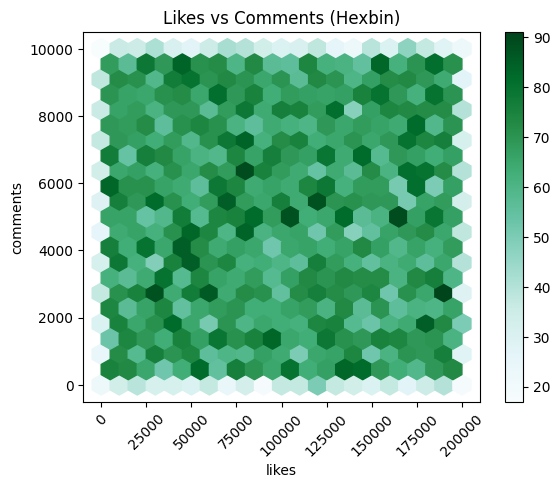

In [20]:
plt.figure(figsize =(12,12))
df.plot.hexbin(x='likes', y='comments', gridsize=20)
plt.title("Likes vs Comments (Hexbin)")
plt.xticks(rotation=45)
plt.show()


* Box Plot

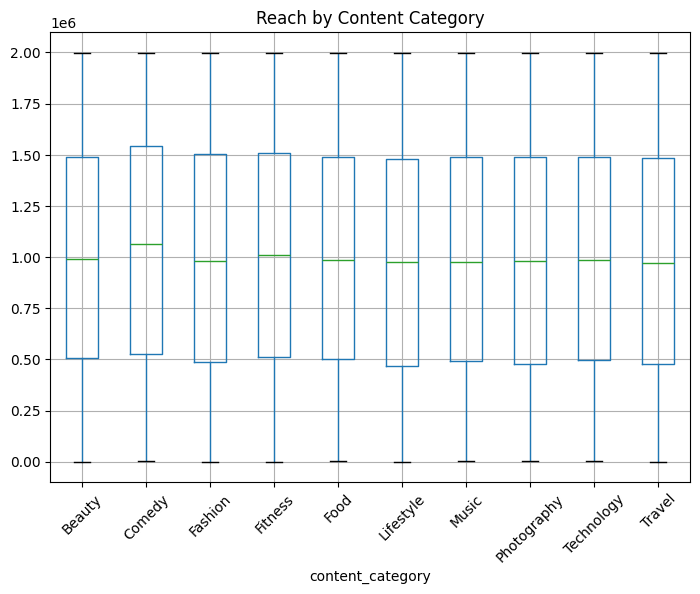

In [21]:
#reach by content
df.boxplot(column='reach', by='content_category', figsize=(8,6))
plt.xticks(rotation=45)
plt.title("Reach by Content Category")
plt.suptitle("")
plt.show()


* Histogram

In [22]:
#distribution of caption length
df.head()

,post_id,upload_date,media_type,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,traffic_source,engagement_rate,content_category
0,IG0000001,2024-11-30 09:25:22.954916,Reel,31627,7559,4530,6393,615036,1007750,1340,3,899,Home Feed,4.97,Technology
1,IG0000002,2025-08-15 09:25:22.954916,Photo,63206,3490,1680,6809,1237071,1345900,1351,20,805,Hashtags,5.59,Fitness
2,IG0000003,2025-09-11 09:25:22.954916,Reel,94373,3727,1761,8367,1127470,1305369,242,24,758,Reels Feed,8.29,Beauty
3,IG0000004,2025-09-18 09:25:22.954916,Reel,172053,7222,2875,9290,764030,897874,446,11,402,External,21.32,Music
4,IG0000005,2025-03-21 09:25:22.954916,Video,99646,2703,4444,9746,7004,495406,1905,8,155,Profile,23.52,Technology


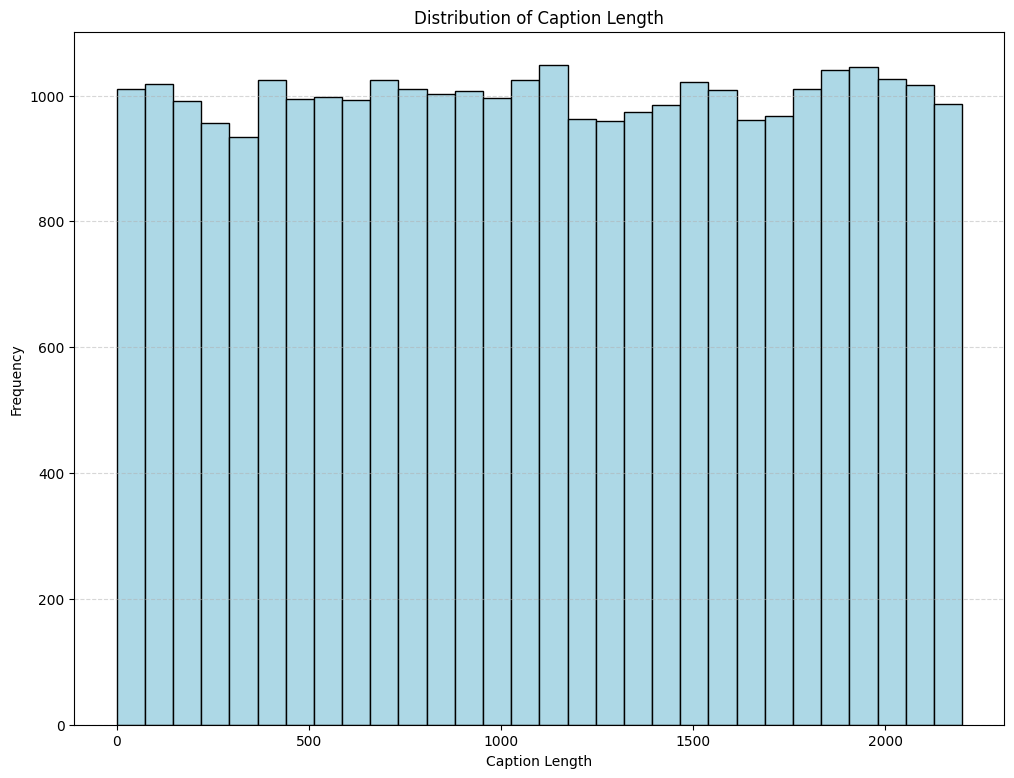

In [23]:
plt.figure(figsize = (12,9))
df['caption_length'].plot(kind = 'hist', bins = 30, edgecolor = 'black',color = 'lightblue')
plt.title("Distribution of Caption Length")
plt.xlabel("Caption Length")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [24]:
#Calculate a new metric: Interaction Score (likes+comments+shares+saves).

df['interaction_score'] = df['likes']+df['comments']+df['shares']+df['saves']

In [25]:
df.head()


,post_id,upload_date,media_type,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,traffic_source,engagement_rate,content_category,interaction_score
0,IG0000001,2024-11-30 09:25:22.954916,Reel,31627,7559,4530,6393,615036,1007750,1340,3,899,Home Feed,4.97,Technology,50109
1,IG0000002,2025-08-15 09:25:22.954916,Photo,63206,3490,1680,6809,1237071,1345900,1351,20,805,Hashtags,5.59,Fitness,75185
2,IG0000003,2025-09-11 09:25:22.954916,Reel,94373,3727,1761,8367,1127470,1305369,242,24,758,Reels Feed,8.29,Beauty,108228
3,IG0000004,2025-09-18 09:25:22.954916,Reel,172053,7222,2875,9290,764030,897874,446,11,402,External,21.32,Music,191440
4,IG0000005,2025-03-21 09:25:22.954916,Video,99646,2703,4444,9746,7004,495406,1905,8,155,Profile,23.52,Technology,116539


In [26]:
#Which traffic source has the highest average reach?
df.groupby('traffic_source')['reach'].mean().sort_values(ascending = False)

traffic_source
Profile       1.012731e+06
External      9.998170e+05
Hashtags      9.973863e+05
Home Feed     9.951300e+05
Reels Feed    9.944801e+05
Explore       9.795356e+05
Name: reach, dtype: float64

In [27]:
#Find correlation between all numeric variables.
df.corr(numeric_only = True)

,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,engagement_rate,interaction_score
likes,1.000000,-0.000191,0.006214,-0.001921,0.003920,0.002286,0.002701,-0.000321,-0.006876,0.242971,0.995661
comments,-0.000191,1.000000,-0.004454,-0.004837,-0.002184,0.000846,-0.008679,0.008639,-0.001411,0.018799,0.049002
shares,0.006214,-0.004454,1.000000,0.005221,-0.009531,-0.011702,0.000461,-0.002916,0.003215,0.008056,0.031259
saves,-0.001921,-0.004837,0.005221,1.000000,0.001756,0.003282,0.012870,-0.001233,0.002627,0.008849,0.072817
reach,0.003920,-0.002184,-0.009531,0.001756,1.000000,0.970222,-0.005848,-0.004425,-0.002331,-0.338687,0.003689
impressions,0.002286,0.000846,-0.011702,0.003282,0.970222,1.000000,-0.007318,-0.003734,-0.002992,-0.366118,0.002273
caption_length,0.002701,-0.008679,0.000461,0.012870,-0.005848,-0.007318,1.000000,0.004147,-0.001923,0.013390,0.003233
hashtags_count,-0.000321,0.008639,-0.002916,-0.001233,-0.004425,-0.003734,0.004147,1.000000,0.004615,0.000148,-0.000056
followers_gained,-0.006876,-0.001411,0.003215,0.002627,-0.002331,-0.002992,-0.001923,0.004615,1.000000,-0.001056,-0.006640
engagement_rate,0.242971,0.018799,0.008056,0.008849,-0.338687,-0.366118,0.013390,0.000148,-0.001056,1.000000,0.243713


In [28]:
#Compare performance of Reels vs Photos vs Videos using mean interaction score.
#Shows which media_type performs best.
df.groupby('media_type')['interaction_score'].mean()

media_type
Carousel    114984.387324
Photo       114825.704371
Reel        115250.291816
Video       114632.717666
Name: interaction_score, dtype: float64

* Line chart: impressions over time.

In [29]:
#Compare performance of Reels vs Photos vs Videos using mean interaction score.

df.groupby('media_type')['interaction_score'].mean()

media_type
Carousel    114984.387324
Photo       114825.704371
Reel        115250.291816
Video       114632.717666
Name: interaction_score, dtype: float64

* Line chart: impressions over time.


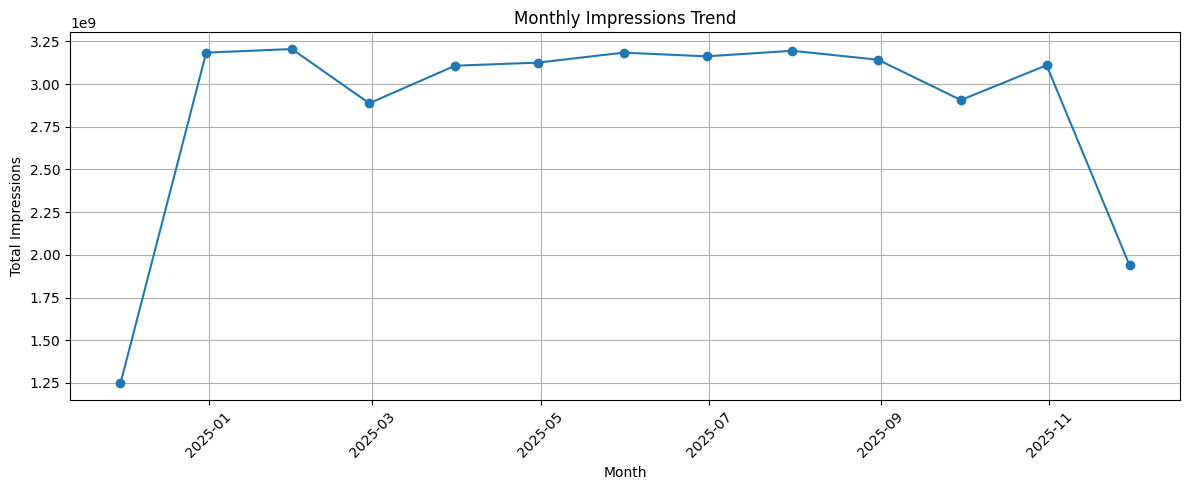

In [31]:
df['upload_date'] = pd.to_datetime(df['upload_date'])

# Aggregate by month
df_monthly = df.groupby(pd.Grouper(key='upload_date', freq='ME'))['impressions'].sum().reset_index()

plt.figure(figsize=(12,5))
plt.plot(df_monthly['upload_date'], df_monthly['impressions'], marker='o')
plt.title("Monthly Impressions Trend")
plt.xlabel("Month")
plt.ylabel("Total Impressions")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Heatmap: correlation matrix.

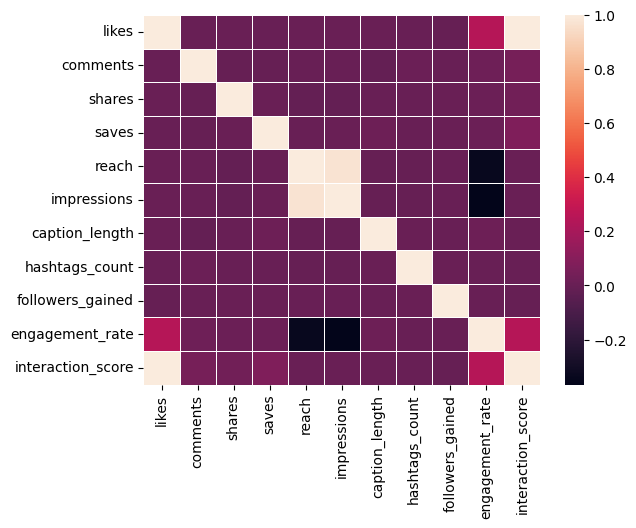

In [40]:
df_numeric = df.select_dtypes(include = ['number'])

sns.heatmap(df_numeric.corr(), linewidth = 0.5, linecolor = 'white')
plt.show()

Boxplot: Engagement rate by media type.

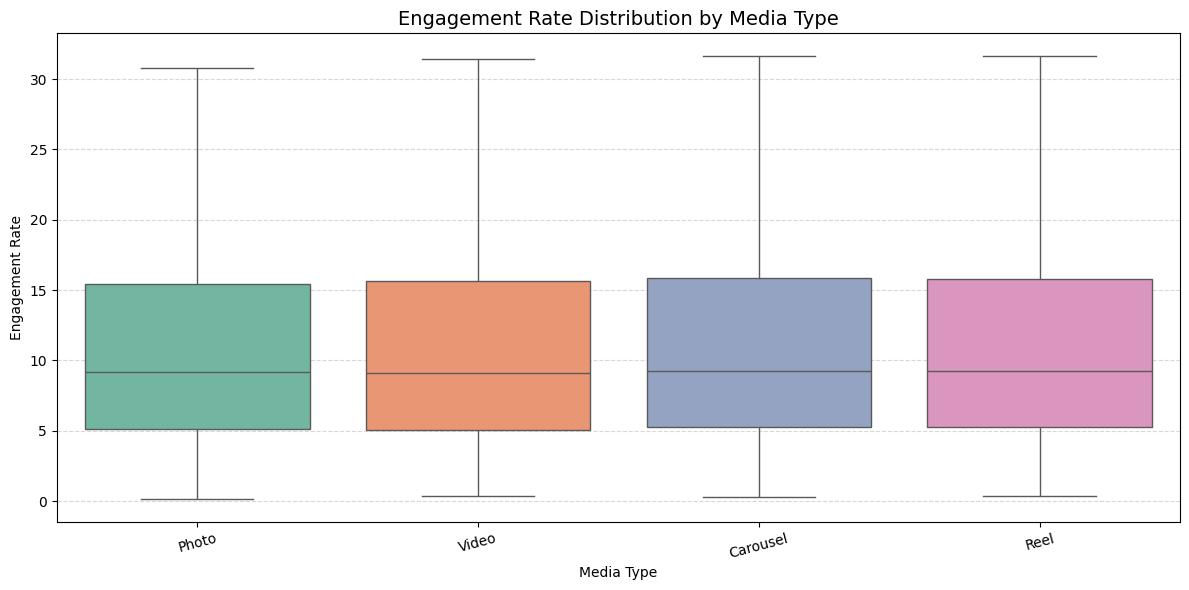

In [45]:
plt.figure(figsize = (12,6))

sns.boxplot( x = 'media_type',
             y = 'engagement_rate',
             data = df,
              hue='media_type',
    legend=False,
    palette='Set2',
    showfliers=False        
)

plt.title("Engagement Rate Distribution by Media Type", fontsize=14)
plt.xlabel("Media Type")
plt.ylabel("Engagement Rate")
plt.xticks(rotation=15)        # avoid crowded labels
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Scatter plot: Reach vs Impressions colored by media type.

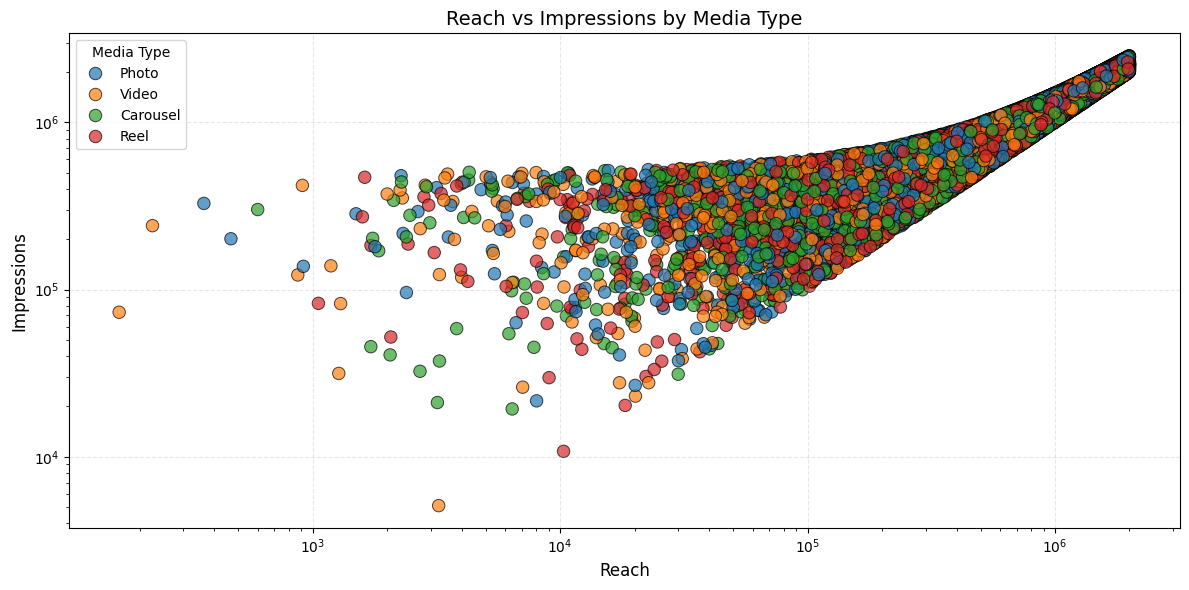

In [48]:
plt.figure(figsize = (12,6))

sns.scatterplot ( x = 'reach',
                  y = 'impressions',
                  data = df,
                  hue = 'media_type',
                  palette = 'tab10',
                  s = 80,
                  edgecolor = 'black',
                  alpha = 0.7)

plt.xscale('log')
plt.yscale('log')


plt.title("Reach vs Impressions by Media Type", fontsize=14)
plt.xlabel("Reach", fontsize=12)
plt.ylabel("Impressions", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title="Media Type")
plt.tight_layout()
plt.show()

Bar chart: Average followers gained per content category.

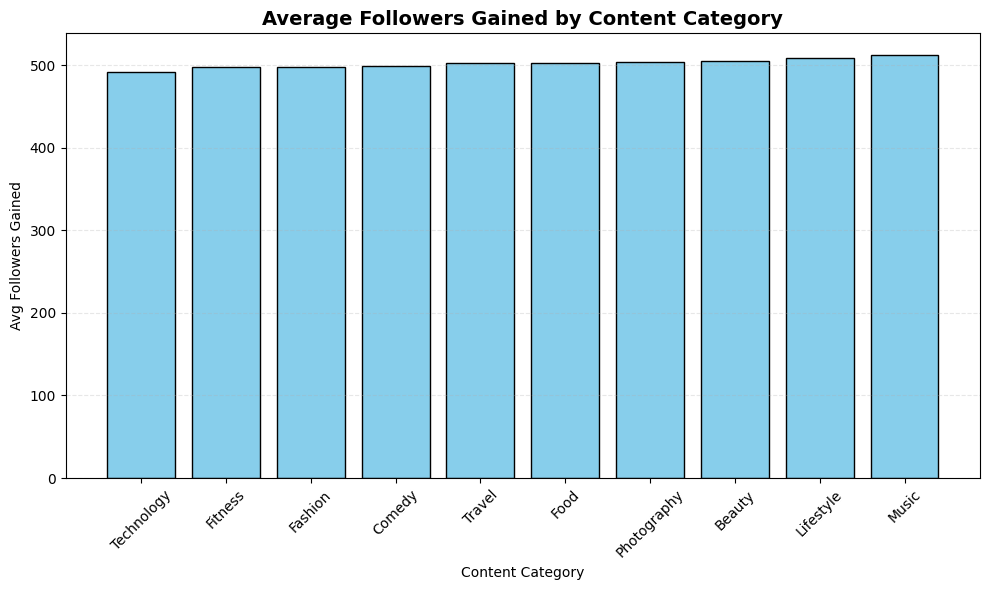

In [53]:
bar = df.groupby('content_category')['followers_gained'].mean().sort_values()

plt.figure(figsize=(10,6))

plt.bar(
    bar.index,
    bar.values,
    color='skyblue',
    edgecolor='black'
)

plt.title("Average Followers Gained by Content Category", fontsize=14, weight='bold')
plt.xlabel("Content Category")
plt.ylabel("Avg Followers Gained")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()